# Process for Kaggle

**Which passengers survived the tragedy?**

- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

# 1.Import Libraries

In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

# 2.Read Files

In [2]:
train= pd.read_csv("E:\PBL 1 - Titanic/train.csv")
test= pd.read_csv("E:\PBL 1 - Titanic/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 3.Append train + test

In [5]:
# get titanic & test csv files as a DataFrame

full_data = train.append( test , ignore_index = True )
titanic = full_data

# 4.Look at Data

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


# 5.Data Cleaning
#Filling up the missing values

** Age**

28.0
29.8811376673


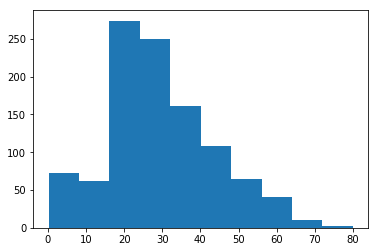

In [8]:
# Mapping out to see if we should use mean or median. Finding not null for Age
filledAge=titanic[titanic['Age'].notnull()] # this remove all columns that are null for Age
plt.hist(filledAge['Age']) #Creates a hist with the given data for Age

#Based on histogramn we should use the midean., The mean woiuld actually be filling in an age that is a little low for the data
# Printing mean and median for comparison
print titanic['Age'].median()
print titanic['Age'].mean()

In [9]:
#Filling up missing values with mean Age and Fare
titanic.Age.fillna(titanic['Age'].median(),inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


** Cabin**

In [10]:
# Cabin: The room the passenger was listed in the documentations
# - First letter denove the floor you're in.
# CABIN HELPS TO INCREASE THE RANK. LOOK FURTHER
# bASED ON WHERE THE TITANIC HIT YOU HAVE HIGHER CHANCES OF SURVIVAL
# Check were survived is at and attribute value to the position most survived were at

# del titanic['Cabin'] # Method1
# titanic=titanic.drop('Cabin',axis=1,inplace=True) # Method2
# adding a feature with a new column that helps the algorith to see whether the room position helped them to survive

# For now:
#del titanic['Cabin']

**Embarked**

In [11]:
# Filling up blanks in Embarked by n/a
print titanic.isnull().sum()['Embarked'] # Checking how many nulls

2


In [12]:
# Checking for values
print titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [13]:
# Fill in with n/a or fill in with the most likely MODE - You can't use mode because it is categorical - most people embarked from S
titanic['Embarked'].fillna('S',inplace=True)
# OR the way below:
# titanic.Embarked.replace(np.nan,"S",inplace=True)

In [14]:
# Confirming value replacement
print titanic.isnull().sum()['Embarked'] 

0


** Fare**

In [15]:
# Checking the values for Fare
titanic.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

14.4542
33.2954792813


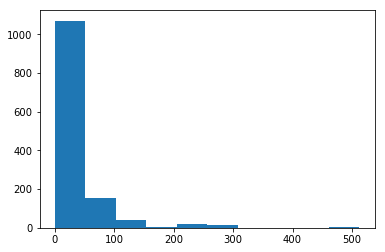

In [16]:
# Mapping out to see if we should use mean or median. Finding not null for Fare
filledFare=titanic[titanic['Fare'].notnull()] # this remove all columns that are null for Fare
plt.hist(filledFare['Fare']) #Creates a hist with the given data for Fare

# Printing mean and median for comparison
print titanic['Fare'].median()
print titanic['Fare'].mean()

In [17]:
# Finding the sum of null values for Fare
titanic.isnull().sum()['Fare']

1

In [18]:
#Filling up missing values with mean Fare
#titanic.Age.fillna(titanic['Age'].median(),inplace=True) - Keep this line to see how to add more than one replacement at once
titanic['Fare'].fillna(titanic['Fare'].median(),inplace=True)

# OR = titanic.Fare.fillna(titanic['Fare'].media(),inplace=True)

**PClass**

In [19]:
# Tranforming Pclass from float to int so we can create dummies for it
titanic['Pclass']=titanic['Pclass'].astype(str)

** GroupBy AGE and Sex to fill in SexNulls**

In [20]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    28.572082
male      30.017888
Name: Age, dtype: float64

In [21]:
avg_age=titanic.groupby('Sex')['Age'].mean()

In [22]:
avg_age[0],avg_age[1]

(28.572081545064378, 30.017888493475684)

In [23]:
avg_age_female= avg_age[0]
avg_age_male=avg_age[1]

In [24]:
# replacing null sex based on sex x age
titanic['Age']=np.where(((titanic['Age'].isnull())&(titanic['Sex']=='female')),avg_age_female,titanic['Age'])

In [25]:
# Checking the indexes
titanic.ix[[19,28,32]]

C:\Users\Talita\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
19,28.0,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
28,28.0,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
32,28.0,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,1.0,335677


In [26]:
# replacing null sex based on sex x age
titanic['Age']=np.where(((titanic['Age'].isnull())&(titanic['Sex']=='male')),avg_age_male,titanic['Age'])

** Checking Nulls**

In [27]:
# Bringing only nulls
titanic.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [28]:
#Deleting Name, cabin and ticket for the meantime just to complete initial preditions - add them back
titanic.drop(['Name','Ticket','Cabin'],inplace=True,axis=1) # removing name
# titanic.drop(['Ticket','Cabin'],inplace=True,axis=1)

# 6.Future Engineering

In [29]:
titanic.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,1,3,male,1,0.0
1,38.0,C,71.2833,0,2,1,female,1,1.0
2,26.0,S,7.9250,0,3,3,female,0,1.0
3,35.0,S,53.1000,0,4,1,female,1,1.0
4,35.0,S,8.0500,0,5,3,male,0,0.0


** Dummies**

In [30]:
# Due to wether I may want to revert to the original data set, I will make a copy
titanic_dummies=titanic.copy()
titanic_dummies.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,1,3,male,1,0.0
1,38.0,C,71.2833,0,2,1,female,1,1.0
2,26.0,S,7.9250,0,3,3,female,0,1.0
3,35.0,S,53.1000,0,4,1,female,1,1.0
4,35.0,S,8.0500,0,5,3,male,0,0.0


In [31]:
# Creating categorical dummies
titanic_dummies=pd.get_dummies(titanic_dummies,columns=['Embarked'],drop_first=True)
titanic_dummies=pd.get_dummies(titanic_dummies,columns=['Pclass'],drop_first=True)
titanic_dummies=pd.get_dummies(titanic_dummies,columns=['Sex'],drop_first=True)
print titanic_dummies.head(3)

    Age     Fare  Parch  PassengerId  SibSp  Survived  Embarked_Q  Embarked_S  \
0  22.0   7.2500      0            1      1       0.0           0           1   
1  38.0  71.2833      0            2      1       1.0           0           0   
2  26.0   7.9250      0            3      0       1.0           0           1   

   Pclass_2  Pclass_3  Sex_male  
0         0         1         1  
1         0         0         0  
2         0         1         0  


In [32]:
titanic_dummies.head()

,Age,Fare,Parch,PassengerId,SibSp,Survived,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
0,22.0,7.2500,0,1,1,0.0,0,1,0,1,1
1,38.0,71.2833,0,2,1,1.0,0,0,0,0,0
2,26.0,7.9250,0,3,0,1.0,0,1,0,1,0
3,35.0,53.1000,0,4,1,1.0,0,1,0,0,0
4,35.0,8.0500,0,5,0,0.0,0,1,0,1,1


In [33]:
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1309 non-null float64
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
Pclass_2       1309 non-null uint8
Pclass_3       1309 non-null uint8
Sex_male       1309 non-null uint8
dtypes: float64(3), int64(3), uint8(5)
memory usage: 67.8 KB


** Defining X and Y**

In [34]:
# My X will be everything but Survived
#y=titanic_dummies['Survived']
y=titanic_dummies.Survived
X=titanic_dummies.copy()
del X['Survived']

print X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age            1309 non-null float64
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
SibSp          1309 non-null int64
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
Pclass_2       1309 non-null uint8
Pclass_3       1309 non-null uint8
Sex_male       1309 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 57.6 KB
None


In [35]:
print y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64


# *7. Split test + train files*

In [36]:
#Split the data and display results
from sklearn.model_selection import train_test_split

titanic_train = X[:891]
titanic_test= X[891:]

y_titanic_train = y[:891]

print (X.shape , titanic_train.shape , titanic_test.shape, y_titanic_train.shape)

((1309, 10), (891, 10), (418, 10), (891L,))


**7B.Split test + train**

In [37]:
#Split the data and display results
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(titanic_train,y_titanic_train,test_size=0.33, random_state=0)

print (X_train.shape , X_test.shape , y_train.shape, y_test.shape)

((596, 10), (295, 10), (596L,), (295L,))


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 242 to 684
Data columns (total 10 columns):
Age            596 non-null float64
Fare           596 non-null float64
Parch          596 non-null int64
PassengerId    596 non-null int64
SibSp          596 non-null int64
Embarked_Q     596 non-null uint8
Embarked_S     596 non-null uint8
Pclass_2       596 non-null uint8
Pclass_3       596 non-null uint8
Sex_male       596 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 30.8 KB


# 8.Define Algorithm

In [39]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [40]:
#gb=GradientBoostingClassifier()
#log=LogisticRegression()
#tree=DecisionTreeClassifier()
#forest=RandomForestClassifier()
#ada=AdaBoostClassifier()

In [41]:
#GRADIENT BOOSTING
gb=GradientBoostingClassifier()

##LOGISTIC REGRESSION
lr=LogisticRegression()

###RANDOM FOREST
rf= RandomForestClassifier()

###DECISION TREE
dt= DecisionTreeClassifier()

# 9.Fit Algorithm

**Tried fitting multiple algos**

In [42]:
# Gradient Boosting
gbmodel=gb.fit(X_train,y_train)

#Logistic Regression
logmodel=lr.fit(X_train,y_train)

# Random Forest
rfmodel=rf.fit(X_train,y_train)

# Decision Tree
dtmodel=dt.fit(X_train,y_train)

In [43]:
# Kate's model
#l=log.fit(X_train,y_train)
#t=tree.fit(X_train,y_train)
#f=forest.fit(X_train,y_train)
#g=gb.fit(X_train,y_train)
#a=ada.fit(X_train,y_train)

# 10.Predict Algorithm

In [44]:
# Kate's model

print("The score for Logistic Regression is, ", lr.score(X_test, y_test))
print("The score for Decision Trees is ", dt.score(X_test, y_test))
print("The score for Random Forest is ", rf.score(X_test, y_test))
print("The score for Gradient Descent is ", gb.score(X_test, y_test))
#print("The score for AdaBoost is ", a.score(X_test, y_test))

('The score for Logistic Regression is, ', 0.80000000000000004)
('The score for Decision Trees is ', 0.72542372881355932)
('The score for Random Forest is ', 0.79661016949152541)
('The score for Gradient Descent is ', 0.84067796610169487)


In [45]:
# Based on this, we pick the best one
# as per Zia, I used logistic regression

In [46]:
pred_gb=gb.predict(X_test)

pred_lr=lr.predict(X_test)

pred_rf=rf.predict(X_test)

pred_dt=dt.predict(X_test)


#pred=lr.predict(x_test)
### pred=rf.predict(x_test)

# GROUPING BY ALGORITHM

In [47]:
#GRADIENT BOOSTING
gb=GradientBoostingClassifier()
gb_model=gb.fit(X_train,y_train)
pred_gb=gb.predict(X_test)

In [48]:
##LOGISTIC REGRESSION
lr=LogisticRegression()
log_model=lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)

In [49]:
###RANDOM FOREST
rf= RandomForestClassifier()
rf_model=rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)

In [50]:
###DECISION TREE
dt= DecisionTreeClassifier()
dt_model=dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)

# 11.Calculate Error(ACC Score/F1 Score)

In [51]:
from sklearn.metrics import accuracy_score,f1_score, recall_score, roc_auc_score, precision_score
#log_model=log.fit(X_train,y_train)

In [52]:
# Gradient Boosting
gbmodel=gb.fit(X_train,y_train)

gb_model_pred=gb_model.predict(X_test)

#print (accuracy_score(X_test,gb_model)
print (accuracy_score(y_test,gb_model_pred))
print (precision_score(y_test,gb_model_pred))
print (recall_score(y_test,gb_model_pred))
       
len(gb_model_pred)

0.840677966102
0.813725490196
0.747747747748


295

In [53]:
# Logistic regression
log_model=lr.fit(X_train,y_train)

log_model_pred=log_model.predict(X_test)

#print (accuracy_score(X_test,log_model)
print (accuracy_score(y_test,log_model_pred))
print (precision_score(y_test,log_model_pred))
print (recall_score(y_test,log_model_pred))
       
len(log_model_pred)

0.8
0.754901960784
0.693693693694


295

In [54]:
###RANDOM FOREST
rf_model=rf.fit(X_train,y_train)

rf_model_pred=rf_model.predict(X_test)

#print (accuracy_score(X_test,rf_model)
print (accuracy_score(y_test,rf_model_pred))
print (precision_score(y_test,rf_model_pred))
print (recall_score(y_test,rf_model_pred))
       
len(rf_model_pred)

0.793220338983
0.765957446809
0.648648648649


295

In [55]:
###DECISION TREE

dt_model=dt.fit(X_train,y_train)

dt_model_pred=dt_model.predict(X_test)

#print (accuracy_score(X_test,dt_model)
print (accuracy_score(y_test,dt_model_pred))
print (precision_score(y_test,dt_model_pred))
print (recall_score(y_test,dt_model_pred))
       
len(dt_model_pred)

0.722033898305
0.635514018692
0.612612612613


295

** Printing Accuracy SCore**

In [56]:
#accuracy_score(y_test,pred)

print ("The accuracy score for Gradient Boosting is, ",accuracy_score(y_test,pred_gb))
print ("The accuracy score for Logistic regression is, ",accuracy_score(y_test,pred_lr))
print ("The accuracy score for Random Forest is, ",accuracy_score(y_test,pred_rf))
print ("The accuracy score for Decision Tree is, ",accuracy_score(y_test,pred_dt))


('The accuracy score for Gradient Boosting is, ', 0.84067796610169487)
('The accuracy score for Logistic regression is, ', 0.80000000000000004)
('The accuracy score for Random Forest is, ', 0.84067796610169487)
('The accuracy score for Decision Tree is, ', 0.735593220338983)


In [57]:
#f1_score(y_test,pred)
# based on the accuracy score above, you pick the best one

# *12.Predict (test)*

In [58]:
pred_test=gb.predict(titanic_test)

In [59]:
pred_test

array([ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0

In [60]:
titanic_test.head()

,Age,Fare,Parch,PassengerId,SibSp,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
891,34.5,7.8292,0,892,0,1,0,0,1,1
892,47.0,7.0000,0,893,1,0,1,0,1,0
893,62.0,9.6875,0,894,0,1,0,1,0,1
894,27.0,8.6625,0,895,0,0,1,0,1,1
895,22.0,12.2875,1,896,1,0,1,0,1,0


**Adding a column with the prediction results**

In [61]:
#Definiting a new dataframe - includding a new column
titanic_test['Survived']=pred_test

C:\Users\Talita\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
titanic_test

,Age,Fare,Parch,PassengerId,SibSp,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male,Survived
891,34.5,7.8292,0,892,0,1,0,0,1,1,0.0
892,47.0,7.0000,0,893,1,0,1,0,1,0,0.0
893,62.0,9.6875,0,894,0,1,0,1,0,1,0.0
894,27.0,8.6625,0,895,0,0,1,0,1,1,0.0
895,22.0,12.2875,1,896,1,0,1,0,1,0,1.0
896,14.0,9.2250,0,897,0,0,1,0,1,1,1.0
897,30.0,7.6292,0,898,0,1,0,0,1,0,1.0
898,26.0,29.0000,1,899,1,0,1,1,0,1,1.0
899,18.0,7.2292,0,900,0,0,0,0,1,0,1.0
900,21.0,24.1500,0,901,2,0,1,0,1,1,0.0


In [63]:
submit=titanic_test[['PassengerId','Survived']]

In [64]:
submit.head()

,PassengerId,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,0.0
895,896,1.0


# *13.Save 'csv' with No Index (Only ID and Survived columns)

In [65]:
submit['Survived']=submit['Survived'].astype(int)

C:\Users\Talita\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
submit.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [67]:
submit.to_csv('submission_Titanic_10_01_algos.csv', index=False)

In [68]:
#Finding saved files

!CD

E:\PBL 1 - Titanic
